In [1]:
import sys
print(sys.version)

#array and vector processing 
import numpy as np
print(f'Numpy version:', np.__version__)

import pandas as pd
print(f'Pandas version:', pd.__version__)

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
print(f'Matplotlib version:', mpl.__version__)
%matplotlib inline

import seaborn as sns
print(f'Seaborn version:', sns.__version__)

#using the datetime object properties in pandas
import datetime as dt
from datetime import timedelta

import ipywidgets as widgets

3.7.7 (default, Mar 23 2020, 17:31:31) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version: 1.19.2
Pandas version: 1.2.4
Matplotlib version: 3.3.4
Seaborn version: 0.11.1


### Reading the data

In [2]:
df = pd.read_csv('./data/2_new_features_outliers_removed.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'index', 'id', 'vendor_id', 'pickup_datetime',
       'dropoff_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'duration', 'distance', 'manhattan_dist',
       'duration_hours', 'duration_min', 'dur_to_dist_m_hpkm',
       'dur_to_dist_m_spkm', 'speed_kmph_m', 'day_name', 'hour', 'price',
       'month_name', 'day'],
      dtype='object')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033660 entries, 0 to 1033659
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1033660 non-null  int64  
 1   index               1033660 non-null  int64  
 2   id                  1033660 non-null  object 
 3   vendor_id           1033660 non-null  int64  
 4   pickup_datetime     1033660 non-null  object 
 5   dropoff_datetime    1033660 non-null  object 
 6   passenger_count     1033660 non-null  int64  
 7   pickup_longitude    1033660 non-null  float64
 8   pickup_latitude     1033660 non-null  float64
 9   dropoff_longitude   1033660 non-null  float64
 10  dropoff_latitude    1033660 non-null  float64
 11  store_and_fwd_flag  1033660 non-null  bool   
 12  duration            1033660 non-null  int64  
 13  distance            1033660 non-null  float64
 14  manhattan_dist      1033660 non-null  float64
 15  duration_hours 

### subsetting the required data

In [5]:
df = df[['id','pickup_datetime','price']]

In [6]:
print(df.shape)
df.head(3)


(1033660, 3)


,id,pickup_datetime,price
0,id2966204,2016-05-01 10:37:00,3.5
1,id3871388,2016-06-13 09:46:00,3.5
2,id2922653,2016-05-02 11:27:00,3.5


Let's use this subset of the dataframe for our visualisation purposes.

### Saving the sorted index and Parsing the datetime 

In [7]:
# Converting the data type for `pickup and dropoff` columns to datetimeIndex

df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])

df['dates'] = df['pickup_datetime'].dt.date
df['dates'] = pd.to_datetime(df['dates'])
# df['time'] = pd.to_datetime(df['pickup_datetime']).dt.time


In [8]:
# # setting the index and sorting the df.

# df_sort = df.set_index("pickup_datetime").sort_index()
# df = df_sort

In [9]:
# categories as default are unordered, setting the order of category for month and day names
from pandas.api.types import CategoricalDtype

month_cat = CategoricalDtype(categories=["January", "February","March","April","May","June"], ordered = True)
day_cat = CategoricalDtype(categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], ordered = True)


In [10]:
df["month_name"] = df['pickup_datetime'].dt.month_name().astype(month_cat)
df["day"] = df['pickup_datetime'].dt.day
df["day_name"] = df['pickup_datetime'].dt.day_name().astype(day_cat)
df["hour"] = df['pickup_datetime'].dt.hour


In [11]:
df = df[['id','pickup_datetime','dates','month_name','day_name','hour','day','price']]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033660 entries, 0 to 1033659
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   id               1033660 non-null  object        
 1   pickup_datetime  1033660 non-null  datetime64[ns]
 2   dates            1033660 non-null  datetime64[ns]
 3   month_name       1033660 non-null  category      
 4   day_name         1033660 non-null  category      
 5   hour             1033660 non-null  int64         
 6   day              1033660 non-null  int64         
 7   price            1033660 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 49.3+ MB


In [13]:
df.to_csv('./data/3_df_sort_datetime_set.csv')


## Plotting the Trend Lines

Text(0, 0.5, 'Count ')

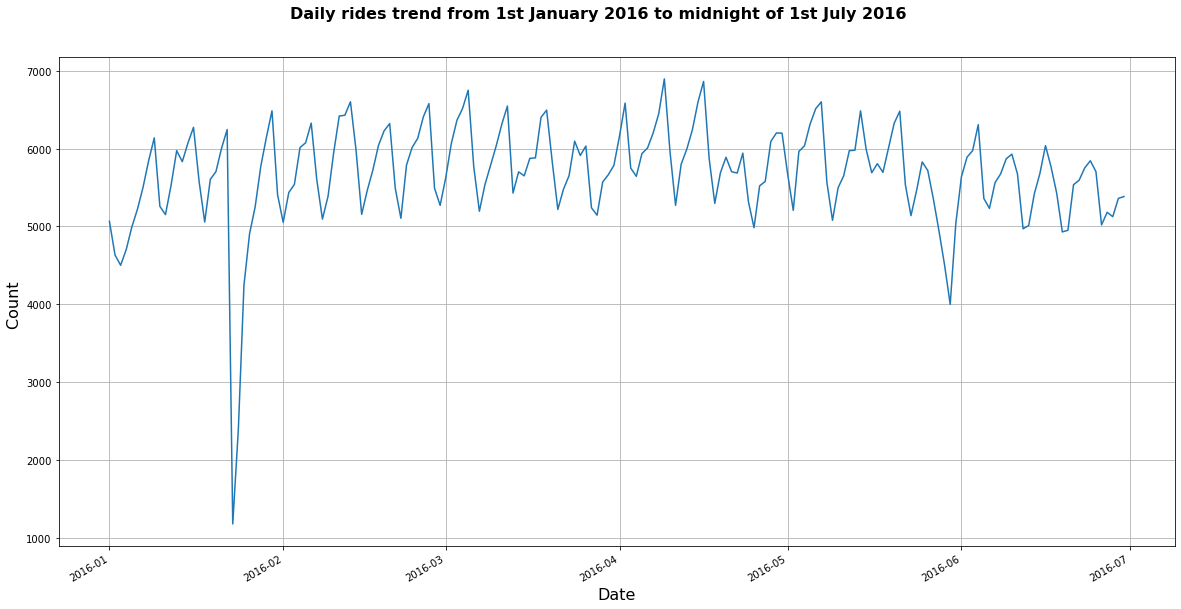

In [14]:
#plot of 6 month data between 1st January 2016 to midnight of 1st July 2016
# The total time window constitutes 182 days and 23 hours and 2 minutes.

fig,ax = plt.subplots(1, figsize=(20,10))
fig.suptitle('Daily rides trend from 1st January 2016 to midnight of 1st July 2016', size=16, y=0.95, weight='bold')

# sns.countplot(x='dates', data=df, ax=ax)

df['dates'].value_counts().plot(grid=True)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Count ', fontsize=16)

There are clear spikes in this data set for the 6 month taxi ride data - could be attributed to holidays / special occassios / others. Need to check the correlation with such events. 

Text(0.5, 1.0, 'Trips by hour')

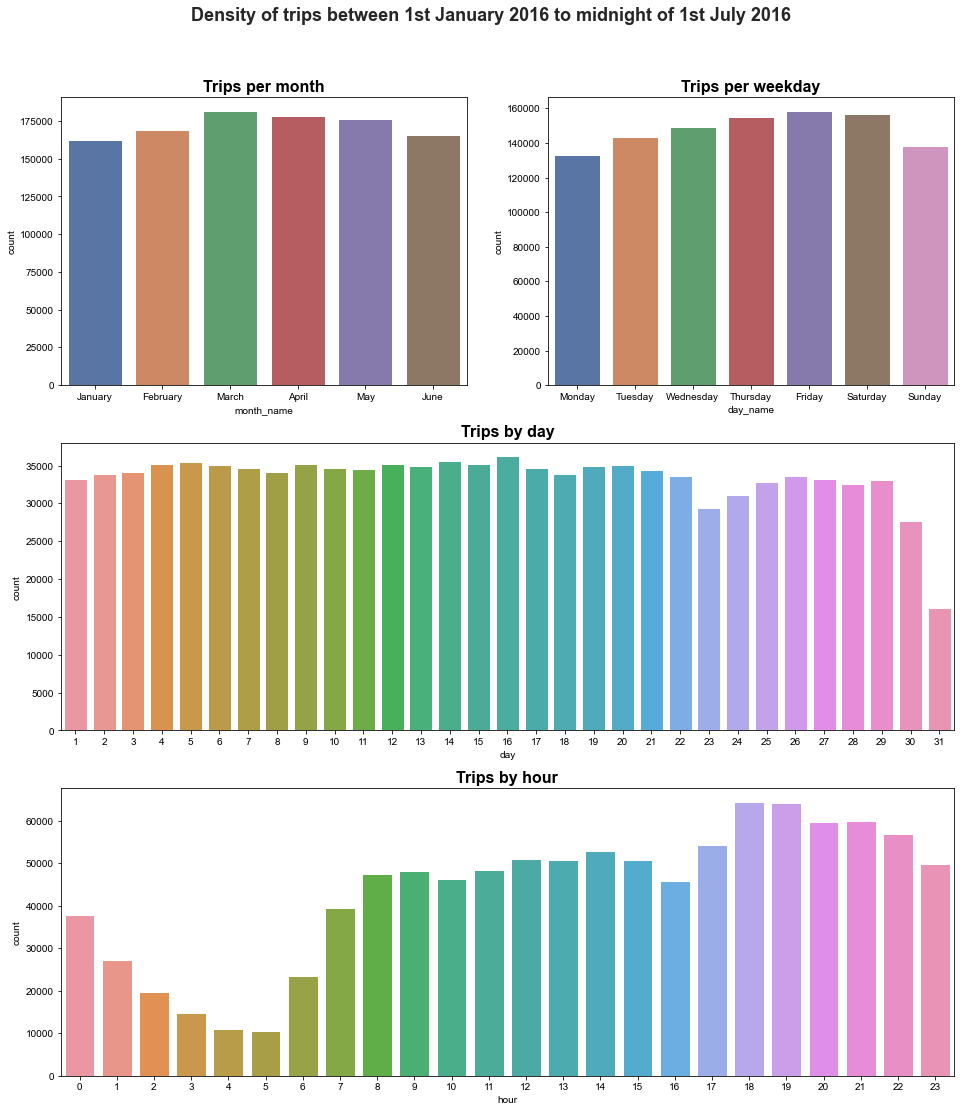

In [15]:
#adding figures

fig = plt.figure(figsize=(16,18))
ax1=fig.add_subplot(321)
ax2=fig.add_subplot(322)
ax3=fig.add_subplot(312)
ax4=fig.add_subplot(313)

#setting the styles
from matplotlib import style

#styles
# style.use('ggplot')
sns.set_theme()
# sns.set_style("ticks")
# sns.set_context("paper", font_scale = 1.3,)

fig.suptitle('Density of trips between 1st January 2016 to midnight of 1st July 2016 ',fontsize='18', weight='bold',y=0.95)

#plot1

sns.countplot(x='month_name', data=df, ax=ax1) #color='b'
ax1.set_title('Trips per month', fontsize='16',weight='bold')

#plot2

sns.countplot(x='day_name', data=df, ax=ax2) #color='b'
ax2.set_title('Trips per weekday',fontsize='16',weight='bold')

#plot3

sns.countplot(x='day', data=df, ax=ax3)
ax3.set_title('Trips by day',fontsize='16',weight='bold')

#plot4

sns.countplot(x='hour', data=df, ax=ax4) #color='C0'
ax4.set_title('Trips by hour',fontsize='16', weight='bold')

### Weekend versus Weekday comparsion of rides. 

In [16]:
df.day_name.value_counts()

Friday       158455
Saturday     156493
Thursday     155088
Wednesday    149072
Tuesday      143343
Sunday       138422
Monday       132787
Name: day_name, dtype: int64

In [17]:
weekend = ['Saturday', 'Sunday']
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
c1_weekend = df.day_name.isin(weekend)
c1_weekday = df.day_name.isin(weekday)

In [57]:
from ipywidgets import interact, interactive, fixed, interact_manual, GridspecLayout

# output = widgets.Output()

# with output:
# #     fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
#     fig = plt.figure(figsize=(16,18))
#     ax1=fig.add_subplot(321)
#     ax2=fig.add_subplot(322)
#     ax3=fig.add_subplot(312)

def filter_datetime(MONTH_NAME ='January', DAY_NAME ='Sunday'):

    if MONTH_NAME =='January':
        t_df = df[(df['month_name'] == MONTH_NAME) & (df['day_name'] == DAY_NAME)]
        display(t_df)
        
        if len(t_df > 1):
            t_df['day_name'].value_count().plot.bar(grid=True, ax=ax1)
            t_df['dates'].value_counts().plot(grid=True, ax=ax2)
            t_df['hour'].value_counts().plot.bar(grid=True, ax=ax3)

        else:
            pass
        
    else:
        display(df[(df['month_name'] == MONTH_NAME) & (df['day_name'] == DAY_NAME)])
            


controls = widgets.VBox([month_name_selector, day_name_selector])            
month_name_selector = widgets.SelectMultiple(
    options=df['month_name'].unique(),
    value= ['January'],
    layout={'width': 'max-content'},
    description='MONTH_NAME',
    disabled=False
    )   

day_name_selector = widgets.SelectMultiple(
    options=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    value=['Sunday'],
    layout={'width': 'max-content'},
    description='DAY_NAME',
    )   


interact(filter_datetime, MONTH_NAME = month_name_selector, DAY_NAME = day_name_selector )

grid = GridspecLayout(4, 3, height='300px')
grid[:3, 1:] = controls
grid[:, 0] = ax1.grid(True)
grid[3, 1] = ax1.grid(True)
grid[3, 2] = ax1.grid(True)
grid

# widgets.HBox([month_name_selector, day_name_selector])

interactive(children=(SelectMultiple(description='MONTH_NAME', index=(5,), layout=Layout(width='max-content'),…

AttributeError: 'NoneType' object has no attribute 'layout'

In [31]:
print(df.loc[c1_weekend].shape)
print(df.loc[c1_weekday].shape)


NameError: name 'c1_weekend' is not defined

In [19]:
df_weekend = df.loc[c1_weekend]
df_weekday = df.loc[c1_weekday]
df_weekend.head(5)

,id,pickup_datetime,dates,month_name,day_name,hour,day,price
0,id2966204,2016-05-01 10:37:00,2016-05-01,May,Sunday,10,1,3.50
5,id3142312,2016-06-18 13:18:00,2016-06-18,June,Saturday,13,18,4.55
6,id1365326,2016-04-02 04:48:00,2016-04-02,April,Saturday,4,2,3.50
8,id3604087,2016-04-09 17:51:00,2016-04-09,April,Saturday,17,9,3.50
14,id1389089,2016-05-29 01:16:00,2016-05-29,May,Sunday,1,29,3.50


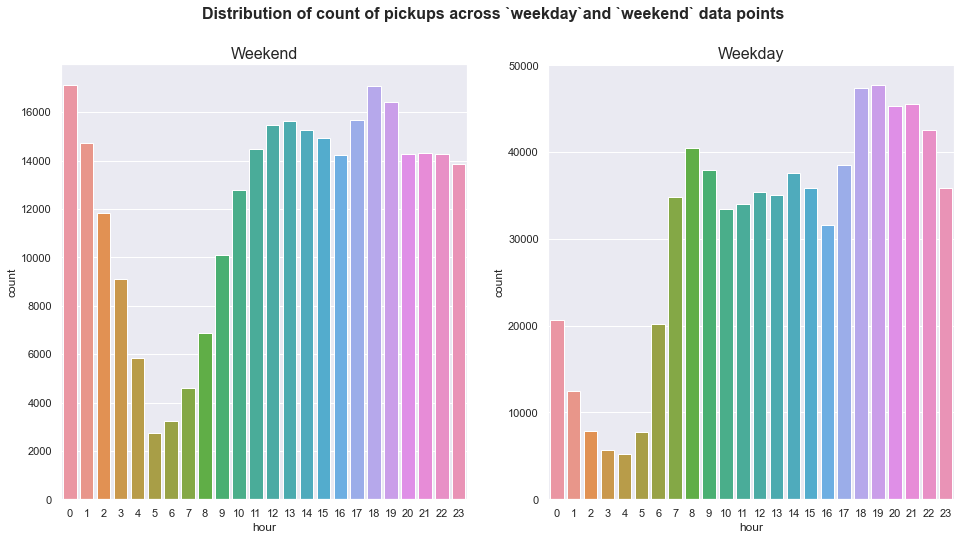

In [20]:
fig = plt.figure(figsize=(16,8))

ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

fig.suptitle('Distribution of count of pickups across `weekday`and `weekend` data points',fontsize='16',weight='bold')
ax1.set_title('Weekend', fontsize='16')
ax2.set_title('Weekday',fontsize='16')

sns.countplot(x='hour', data=df_weekend, ax=ax1 ) #eg: palette="rocket", palette="Blues" color='b'
sns.countplot(x='hour', data=df_weekday, ax=ax2)


# style.use('ggplot')
sns.set_theme()
sns.set_style("ticks")


This comparison of 'weekend' and 'weekday' shows a clear high density pickup happening during the **midnight hours of 0:00 to 3:00 A.M** a clear winner for MVP planning for this time and weekend window.

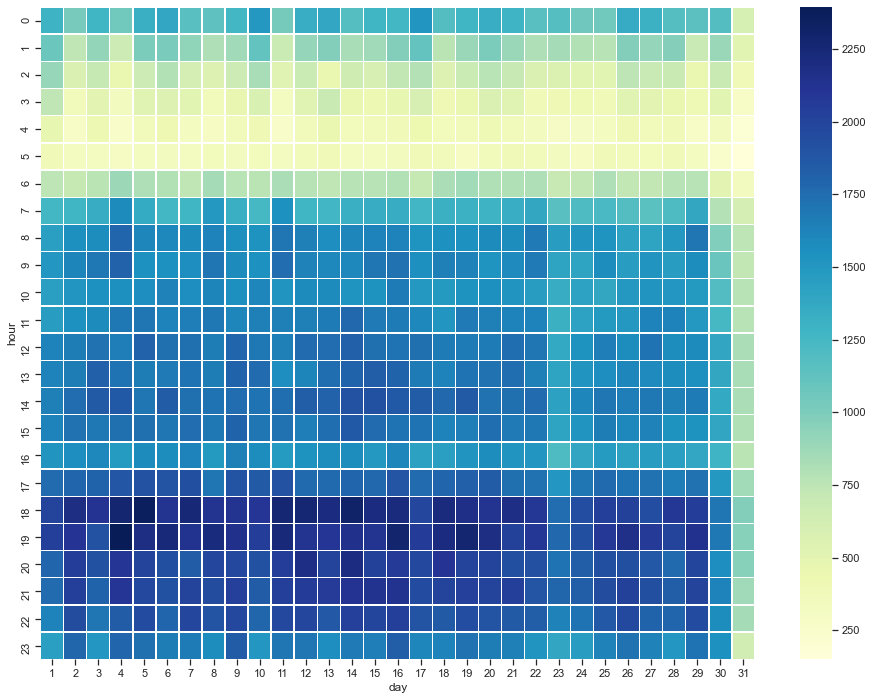

In [22]:
fig = plt.figure(figsize=(16,12))

table=df.groupby([df['day'],df['hour']]).size().unstack('day')

# table.style.background_gradient(cmap='Blues')

sns.heatmap(table, cmap='YlGnBu', linewidths=.35)   #alternate option             
fig.savefig('densitymap of hour-day counts.png')
